### Descriptive Statistics

In [170]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [149]:
dfFlt  = load_df('dfFlt')
dfDesc = load_df('dfDesc')

#### Variable Descriptive Statistics

##### Categorical / Identifier

###### Variables

In [68]:
types = get_var_types()

for f in types['identifierVars']:
  print(f)
  dfFlt.agg(
    F.countDistinct(f).alias('unique'),
    F.count(F.when(F.col(f).isNull(), f)).alias('null')
  ).show()

assessment_id
+------+----+
|unique|null|
+------+----+
|   329|   0|
+------+----+

assessment_instance_attempt_id
+------+----+
|unique|null|
+------+----+
|  8483|3264|
+------+----+

assessment_instance_id
+------+----+
|unique|null|
+------+----+
|   615|   0|
+------+----+

assessment_item_response_id
+------+-----+
|unique| null|
+------+-----+
| 64368|15710|
+------+-----+

learner_assigned_item_attempt_id
+------+----+
|unique|null|
+------+----+
| 79689|   0|
+------+----+

learner_assignment_attempt_id
+------+----+
|unique|null|
+------+----+
|  8855|   0|
+------+----+

learner_id
+------+----+
|unique|null|
+------+----+
|  1126|   0|
+------+----+

org_id
+------+----+
|unique|null|
+------+----+
|     3|   0|
+------+----+

section_id
+------+----+
|unique|null|
+------+----+
|    46|   0|
+------+----+



Totals
- org_id: 3
  - ID per organization
- section_id: 46
  - ID per section/school
- learner_id: 1126
  - ID per learner/student
- assessment_id: 329
  - ID per each assessment/quiz.
- assessment_instance_id: 615
  - ID of each time a section uses the assessment
- assessment_instance_attempt_id: 8483 null: 3264
  - ID of each time an assessment is attempted by a student
- assessment_item_response_id: 64368 null: 15710
  - ID of each response/answer to an assessment question
- learner_assignment_attempt_id: 8855
  - ID of each learner attempt of an assigned assessment
- learner_assigned_item_attempt_id: 79689
  - ID of each learner attempt of a item/question on an assigned assessment

###### Categorical / Nominal

###### Variables

In [34]:
# Categorical / Nominal Values
for f in types['nominalVars']:
  dfFlt.groupBy(f).count().orderBy('count', ascending=False).show(50, False)


+--------------------+-----+
|assigned_item_status|count|
+--------------------+-----+
|scored              |64804|
|offline_scored      |12446|
|assigned            |3264 |
|responded           |34   |
+--------------------+-----+

+------------------------+-----+
|ced_assignment_type_code|count|
+------------------------+-----+
|assessment              |76172|
|practice                |2562 |
|game                    |1555 |
|clo                     |248  |
|rubric                  |11   |
+------------------------+-----+

+----------------------+-----+
|item_type_code_name   |count|
+----------------------+-----+
|multipleChoice        |32451|
|fillInTheBlank        |12072|
|equationEntry         |9516 |
|trueFalse             |4963 |
|cloze                 |3576 |
|null                  |3264 |
|multipleSelect        |2691 |
|graphing              |2415 |
|MultipleChoiceResponse|1550 |
|choiceMatrix          |1336 |
|matching              |1164 |
|bucketing             |1051 |
|sel

Null Values
- response_correctness
  - 3298 null values
    - investigate further
  - 1566 "[unassigned]"
    - investigate further for relation to the 1566 assignment_attempt_number and assignment_max_attempts values
  - Could be null because the question wasn't answered or a different method of scoring the question
- item_type_code_name
  - Investigate further
  - Could be related to unstarted or unanswered questions

Large number of categorical values
- item_type_code_name
  - Need to transform by reclassifying to reduce number of levels

learner_attempt_status
- Unary "fully scored"

In [35]:
# Create Todo list
add_todo('Investigate 3298 null values in response_correctness')
add_todo('Investigate 1566 [unassigned] in response_correctness')
add_todo('Investigate null values in item_type_code_name')
add_todo('Reduce number of levels in item_type_code_name')
add_todo('Remove unary learner_attempt_status = "fully scored"')

###### Correlations Heatmap

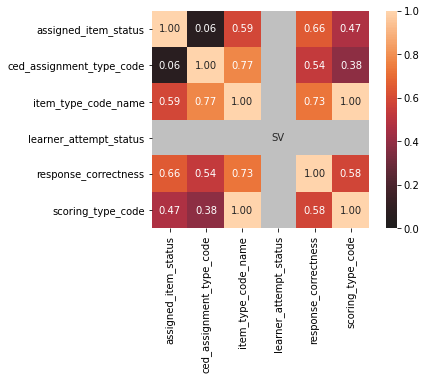

In [36]:
corr, ax = associations( dfFlt.select(*types['nominalVars']).toPandas(), nan_replace_value='null' )

- High correlation between item_type_code_name and scoring_type_code
- learner_attempt_status a single value ('fully scored)

###### Display item_type_code_name and scoring_type_code Corelation

In [37]:
def item_to_code():
  dfPd = dfFlt.select('item_type_code_name','scoring_type_code').toPandas()
  return pd.crosstab(dfPd.item_type_code_name.fillna('null'), dfPd.scoring_type_code.fillna('null'), margins=True, margins_name="Total")

item_to_code()

scoring_type_code,[unassigned],automatic,external,manual,Total
item_type_code_name,,,,,
FillinBlankResponse,5,0,0,0,5
MultipleChoiceResponse,1550,0,0,0,1550
RubricResponse,11,0,0,0,11
aheAlgo,0,0,219,0,219
bucketing,0,1051,0,0,1051
choiceMatrix,0,1336,0,0,1336
cloze,0,3576,0,0,3576
equationEntry,0,9516,0,0,9516
essay,9,0,0,991,1000


- item_type_code_name indicates the scoring_type_code
  - scoring_type_code = '[unnassigned]' for item_type_code_name is..
    - shortAnswer, null, essay (9 times), RubricResponse, MultipleChoiceResponse, FillInBlankResponse
  - scoring_type_code = external only for item_type_code_name = aheAlgo
  - scoring_type_code = 'manual' for item_type_code_name is..
    - essay, fileUpload, shortAnswer
  - Consider correlation when reducing number of levels in item_type_code_name

##### Numerical / Continuous

###### Variables

In [38]:
def num_cont_vars():
  # Numerical / Continuous Variables
  desc = dfFlt.describe()
  for f in types['continousVars']:
    desc.select("summary", f).show(5,False)

num_cont_vars()

+-------+-------------------------+
|summary|assignment_attempt_number|
+-------+-------------------------+
|count  |80548                    |
|mean   |0.9805581764910364       |
|stddev |0.13807271883793762      |
|min    |0                        |
|max    |1                        |
+-------+-------------------------+

+-------+-----------------------+
|summary|assignment_max_attempts|
+-------+-----------------------+
|count  |80548                  |
|mean   |0.9805581764910364     |
|stddev |0.13807271883793762    |
|min    |0                      |
|max    |1                      |
+-------+-----------------------+

+-------+----------------------+
|summary|final_score_unweighted|
+-------+----------------------+
|count  |80548                 |
|mean   |13.131449570442468    |
|stddev |14.834671089990332    |
|min    |0                     |
|max    |60                    |
+-------+----------------------+

+-------+---------------------------------+
|summary|number_of_distinc

###### Histograms

assignment_attempt_number
assignment_max_attempts
final_score_unweighted
number_of_distinct_instance_items
number_of_learners
points_possible_unweighted


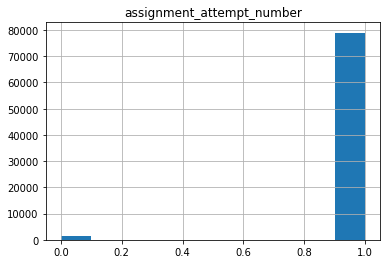

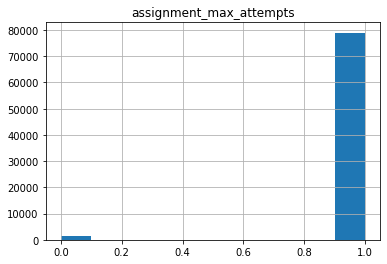

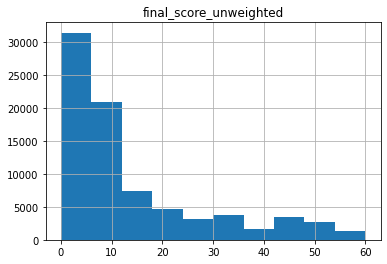

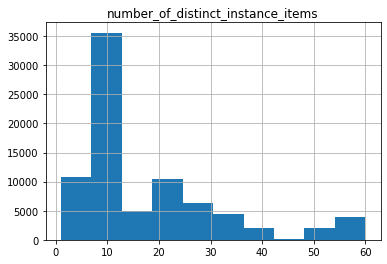

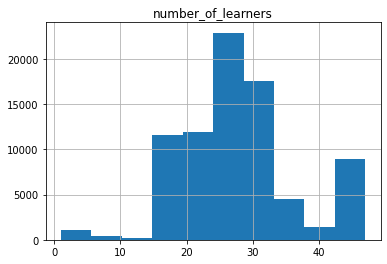

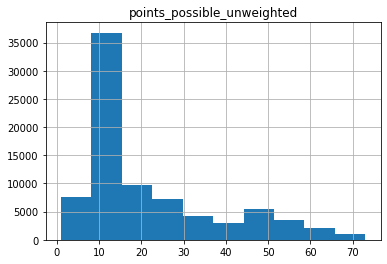

In [39]:
for f in types['continousVars']:
  print(f)
  dfFlt.select(f).toPandas().hist()

Normal Distribution
- number_of_learners
- possible outliers greaterthan 40
- investigate further

Right Skewed
- final_score_unweighted
- number_of_distinct_instance_items
- points_possible_unweighted

Binary Values (0/1)
- assignment_max_attempts
- assignment_attempt_number
- Appears binary but the variable name indicates it could have any values. The data only contains 1 and 0
- Investigate further

In [40]:
add_todo("Investigate number_of_learners > 40 outliers")
add_todo("Investigate binary variables assignment_attempt_number and assignment_max_attempts")

###### Heatmap

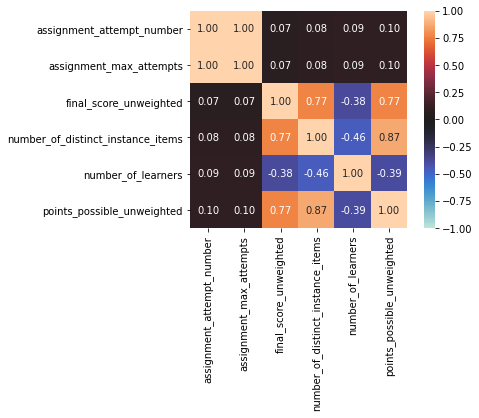

In [41]:
corr, ax = associations( dfFlt.select(*types['continousVars']).toPandas(), nan_replace_value='null' )

- assignment_attempt_number and assignment_max_attempts highly correlated

###### Display assignment_attempt_number and assignment_max_attempts Correlation

In [42]:
def attempt_to_max():
  dfPd = dfFlt.select('assignment_attempt_number', 'assignment_max_attempts').toPandas()
  return pd.crosstab(dfPd.assignment_attempt_number.fillna('null'), dfPd.assignment_max_attempts.fillna('null'), margins=True, margins_name="Total")

attempt_to_max()

assignment_max_attempts,0,1,Total
assignment_attempt_number,,,
0,1566,0,1566
1,0,78982,78982
Total,1566,78982,80548


- assignment_max_attempts 1 is always assignment_attempt_number = 1

###### Null and Zero Variables

In [43]:
for c in types['continousVars']:
  print(c)
  dfFlt.agg(
    F.count(F.when(F.col(c).isNull(), c)).alias('null'),
    F.count(F.when(F.col(c) == 0, c)).alias("zero")
  ).show()

assignment_attempt_number
+----+----+
|null|zero|
+----+----+
|   0|1566|
+----+----+

assignment_max_attempts
+----+----+
|null|zero|
+----+----+
|   0|1566|
+----+----+

final_score_unweighted
+----+-----+
|null| zero|
+----+-----+
|   0|16582|
+----+-----+

number_of_distinct_instance_items
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+

number_of_learners
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+

points_possible_unweighted
+----+----+
|null|zero|
+----+----+
|   0|   0|
+----+----+



- possibile correlation between assignment_attempt_number and assignment_max_attempts
  - both have 1566 zero values
  - Needs further investigation
- final_score_unweighted has 16,582 zero values
  - possibly because not yet scored
  - needs further investigation

In [44]:
add_todo('Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values')
add_todo('Investigate final_score_unweighted has 16,582 zero values')

##### Categorical / Interval

###### Variables

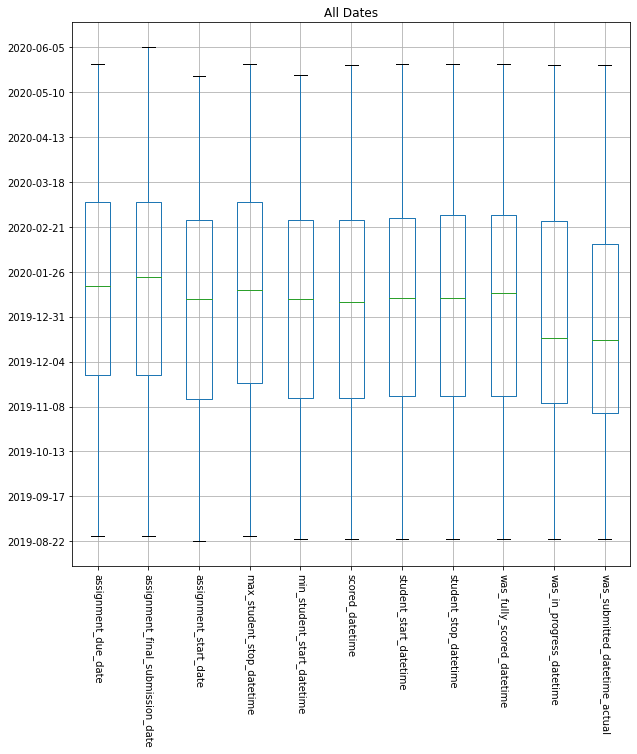

In [45]:
pdDf = dfFlt.sample(False, .01, 8764664).select(* (F.unix_timestamp(c).alias(c) for c in types['intervalVars']) ).toPandas()
date_boxplot(pdDf, "All Dates")

In [46]:
for f in types['intervalVars']:
  print (f)
  dfFlt.agg(
    F.countDistinct(f).alias('unique'),
    F.count(F.when(F.col(f).isNull(), f)).alias('null'),
    F.min(f).alias('min'),
    F.max(f).alias('max')
 ).show(1, False)

assignment_due_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|190   |1566|2019-08-23 04:59:00|2020-05-26 04:59:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|199   |1566|2019-08-23 04:59:00|2020-06-05 04:59:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|206   |1566|2019-08-21 05:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

max_student_stop_datetime
+------+----+-----------------------+-----------------------+
|unique|null|min        

Date Values
- Dates fall in range of a school year of 8/2019 to 5/2020
- Almost all variables have have null dates
  - except max_student_stop_datetime and max_student_stop_datetime
- 1566 null dates
    - in
      - assignment_due_date
      - assignment_final_submission_date
      - assignment_start_date
- Verify same observations as 1566 [unassigned] in response_correctness'
- 749 t0 750 null dates
    - in
      - student_start_datetime
      - student_stop_datetime
      - was_fully_scored_datetime
- 3422 in scored_datetime
- 9965 in was_in_progress_datetime
- 18469 in was_submitted_datetime_actual

In [171]:
add_todo('Investigate 1566 null dates')
add_todo('Investigate 749 t0 750 null dates')
add_todo('Investigate 3422 null dates in scored_datetime')
add_todo('Investigate 9965 null dates in was_in_progress_datetime')
add_todo('Investigate 18469 null dates in was_submitted_datetime_actual')
delete_todo('Investigate why some dates are null')

###### Correlations Heatmap

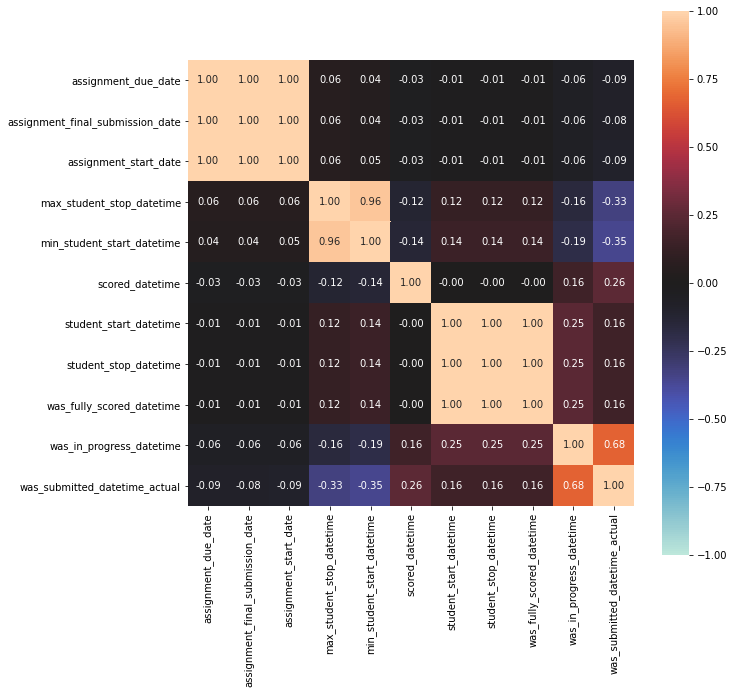

In [48]:
corr, ax = associations( dfFlt.select(* (F.unix_timestamp(c).alias(c) for c in types['intervalVars']) ).toPandas(), figsize=[10,10] )

- Correlated dates
  - assignment_due_date and assignment_final_submission_date
  - assigment_due_date and assignment_start_date
  - min_student_start_datetime and max_student_start_datetime
  - student_start_datetime and student_stop_datetime
  - student_start_datetime and was_fully_scored_datetime
  - student_stop_datetime and was_fully_scored_datetime
- Correlation appears to be because the events closely follow each other

###### Display Date Categories

In [104]:
(
    dfDesc.filter("type = 'Categorical Interval'")
        .select( F.col('category').alias('Category'), F.col('field').alias('Categorical Interval'))
        .orderBy('category', 'field')
        .show(20,False)
)

+------------------+--------------------------------+
|Category          |Categorical Interval            |
+------------------+--------------------------------+
|Assignment        |assignment_due_date             |
|Assignment        |assignment_final_submission_date|
|Assignment        |assignment_start_date           |
|Assignment        |max_student_stop_datetime       |
|Assignment        |min_student_start_datetime      |
|Assignment Attempt|scored_datetime                 |
|Assignment Attempt|student_start_datetime          |
|Assignment Attempt|student_stop_datetime           |
|Assignment Attempt|was_fully_scored_datetime       |
|Assignment Attempt|was_in_progress_datetime        |
|Assignment Attempt|was_submitted_datetime_actual   |
+------------------+--------------------------------+



###### Mean Days Between All Interval Vars

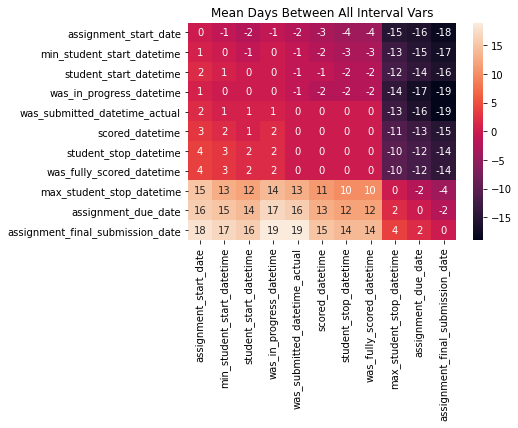

In [168]:
cats = get_var_cats()
# Ordered Interval Vars
allIntVars = [
'assignment_start_date',
'min_student_start_datetime',
'was_in_progress_datetime',
'was_submitted_datetime_actual',
'student_start_datetime',
'scored_datetime',
'student_stop_datetime',
'was_fully_scored_datetime',
'max_student_stop_datetime',
'assignment_due_date',
'assignment_final_submission_date',
]
sampDf = dfFlt.sample(False, .001, 8764664)

date_diff_map(sampDf.select(allIntVars).toPandas(), "Mean Days Between All Interval Vars", 'D')

###### Mean Hours Between Assignment Interval Vars

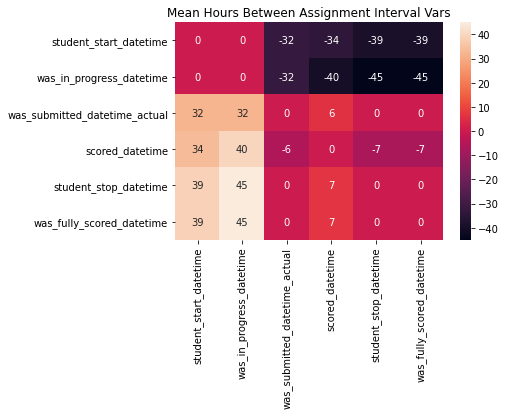

In [167]:
# assignIntVars = [i for i in allIntVars if i not in cats['assignmentVars']]
assignIntVars = [
'student_start_datetime',
'was_in_progress_datetime',
'was_submitted_datetime_actual',
'scored_datetime',
'student_stop_datetime',
'was_fully_scored_datetime',
]
date_diff_map(sampDf.select(assignIntVars).toPandas(), "Mean Hours Between Assignment Interval Vars", 'h')

- Sequence of dates
  - student_start_datetime
  - was_in_progress_datetime (+0 days)
  - was_submitted_datetime_actual (+32 days)
  - scored_datetime (+2 days)
  - student_stop_datetime (+5 days)
  - was_fully_scored_datetime (+5 days)

###### Mean Hours Between Assignment Attempt Interval Vars

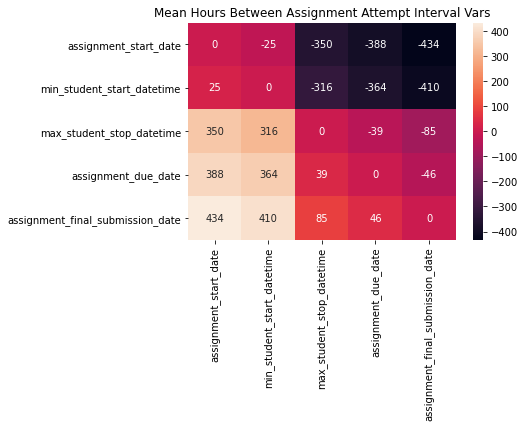

In [169]:
# attemptIntVars = [i for i in allIntVars if i not in cats['assignmentAttemptVars']]
attemptIntVars = [
'assignment_start_date',
'min_student_start_datetime',
'max_student_stop_datetime',
'assignment_due_date',
'assignment_final_submission_date',
]

date_diff_map(sampDf.select(attemptIntVars).toPandas(), "Mean Hours Between Assignment Attempt Interval Vars", 'h')

- Sequence of dates
  - assignment_start_date
  - min_student_start_datetime (+25 hours)
  - max_student_stop_datetime (+325 hours, 13 days)
  - assignment_due_date (+38 hours)
  - assignment_final_submission_date (+46 hours)

##### Binary Variables

In [107]:
# Categorical / Nominal Values
for f in types['binaryVars']:
  dfFlt.groupBy(f).count().orderBy('count', ascending=False).show(50, False)

+--------------------------+-----+
|assignment_late_submission|count|
+--------------------------+-----+
|false                     |80548|
+--------------------------+-----+

+------------------+-----+
|is_affecting_grade|count|
+------------------+-----+
|true              |77986|
|false             |2562 |
+------------------+-----+

+----------+-----+
|is_deleted|count|
+----------+-----+
|false     |80548|
+----------+-----+

+---------------+-----+
|is_force_scored|count|
+---------------+-----+
|false          |68018|
|true           |12530|
+---------------+-----+

+--------------------------+-----+
|is_manual_scoring_required|count|
+--------------------------+-----+
|false                     |80547|
|true                      |1    |
+--------------------------+-----+

+----------------------+-----+
|item_is_offline_scored|count|
+----------------------+-----+
|false                 |68102|
|true                  |12446|
+----------------------+-----+



Variables With Unary Values
- assignment_late_submission and is_deleted
- is_manual_scoring_required has only one true value
- Variables will be removed

###### Correlations Heatmap

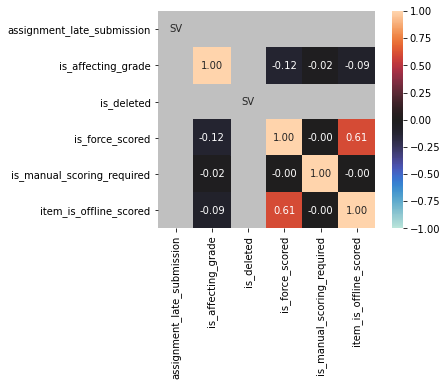

In [50]:
corr, ax = associations( dfFlt.select(*types['binaryVars']).toPandas(), nan_replace_value='null' )

- No correlation
- Unary values in assignment_late_submission, is_manual_scoring_required and is_deleted
  - Remove unary values

In [51]:
add_todo("Remove variables assignment_late_submission, is_manual_scoring_required and is_deleted")

##### Categorical / Nominal and Binary

###### Correlations Heatmap

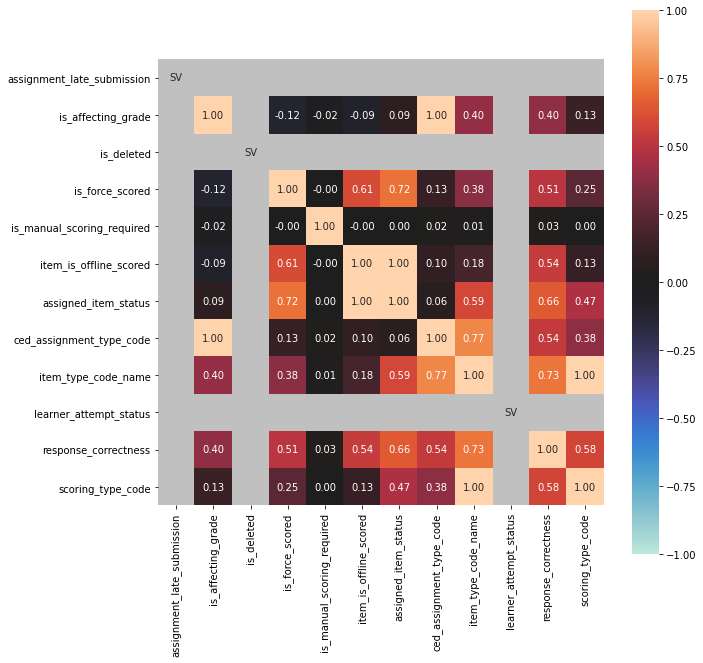

In [52]:
corr, ax = associations( dfFlt.select(*types['binaryVars'], *types['nominalVars']).toPandas(), nan_replace_value='null', figsize=[10,10] )

- New correlations
  - is_affecting_grade and ced_assignment_type_code
  - item_is_offline_scored and assigned_item_status

###### Display is_affecting_grade and ced_assignment_type_code Correlation

In [53]:
def grade_to_code():
  dfPd = dfFlt.select('is_affecting_grade','ced_assignment_type_code').toPandas()
  return pd.crosstab(dfPd.is_affecting_grade.fillna('null'), dfPd.ced_assignment_type_code.fillna('null'), margins=True, margins_name="Total")

grade_to_code()

ced_assignment_type_code,assessment,clo,game,practice,rubric,Total
is_affecting_grade,,,,,,
False,0,0,0,2562,0,2562
True,76172,248,1555,0,11,77986
Total,76172,248,1555,2562,11,80548


- is_affecting_grade = false when ced_assignment_type_code = practice

###### Display item_is_offline_scored and assigned_item_status Correlation

In [54]:
def offline_to_status():
  dfPd = dfFlt.toPandas()
  return pd.crosstab(dfPd.item_is_offline_scored.fillna('null'), dfPd.assigned_item_status.fillna('null'), margins=True, margins_name="Total")

offline_to_status()

assigned_item_status,assigned,offline_scored,responded,scored,Total
item_is_offline_scored,,,,,
False,3264,0,34,64804,68102
True,0,12446,0,0,12446
Total,3264,12446,34,64804,80548


- item_is_offline_scored = True is always assigned_item_status = offline_scored

#### Org, Sections, Learners, Statistics

##### Num Sections by Organization

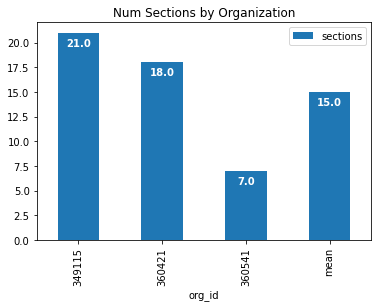

In [55]:
def sections_by_org():
  sByO = dfFlt.groupBy('org_id').agg(F.countDistinct('section_id').alias('sections')).orderBy('org_id')
  pdDf = sByO.toPandas()

  # Add mean
  meanSections = sByO.agg(F.round(F.avg(F.col('sections'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_id': 'mean', 'sections': meanSections}, ignore_index=True)

  ax = pdDf.plot.bar('org_id','sections', title='Num Sections by Organization')
  annotate_plot(ax)
  plt.show()

sections_by_org()

##### Num Learners by Organization

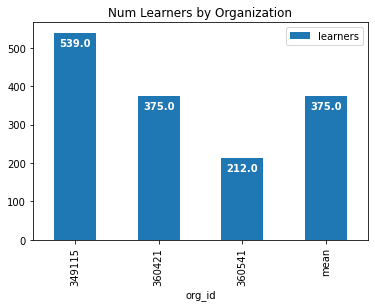

In [56]:
def learners_by_org():
  lByO = dfFlt.groupBy('org_id').agg(F.countDistinct('learner_id').alias('learners')).orderBy('org_id')
  pdDf = lByO.toPandas()

  # Add mean
  meanlearners = lByO.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_id': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_id','learners', title='Num Learners by Organization')
  annotate_plot(ax)
  plt.show()

learners_by_org()

##### Mean Section Learners by Organization

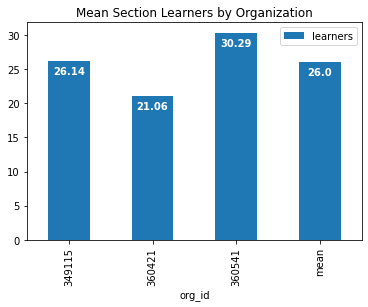

In [57]:
def sec_learners_by_org():
  lByS = dfFlt.groupBy('org_id','section_id').agg(F.countDistinct('learner_id').alias('learners'))
  # Av
  lBySMean = lByS.groupBy('org_id').agg( F.avg('learners').alias('learners') ).orderBy('org_id')
  pdDf = lBySMean.toPandas()

  # Add mean
  meanlearners = lBySMean.agg(F.round(F.avg(F.col('learners'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_id': 'mean', 'learners': meanlearners}, ignore_index=True)

  ax = pdDf.plot.bar('org_id','learners', title='Mean Section Learners by Organization')
  annotate_plot(ax)
  plt.show()

sec_learners_by_org()

##### Mean Section Assessments by Organization

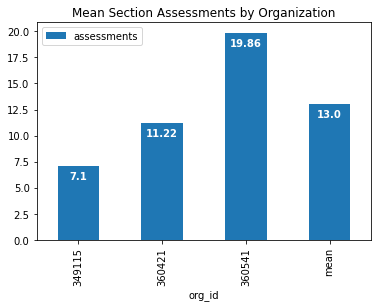

In [58]:
def sec_assess_by_org():
  assessBySection = dfFlt.groupBy('org_id','section_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_id').agg( F.avg('assessments').alias('assessments') ).orderBy('org_id')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_id': 'mean', 'assessments': meanAssess}, ignore_index=True)


  ax = pdDf.plot.bar('org_id','assessments', title='Mean Section Assessments by Organization')
  annotate_plot(ax)
  plt.show()

sec_assess_by_org()

##### Mean Learners Assessments by Organization

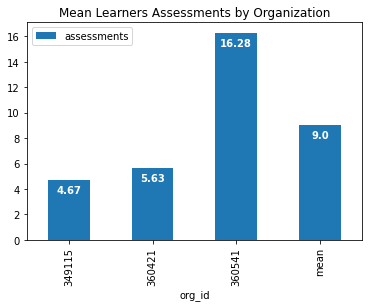

In [59]:
def assess_by_org():
  assessBySection = dfFlt.groupBy('org_id','learner_id').agg(F.countDistinct('assessment_id').alias('assessments'))
  aByS = assessBySection.groupBy('org_id').agg( F.avg('assessments').alias('assessments') ).orderBy('org_id')

  pdDf = aByS.toPandas()

  # Add mean
  meanAssess = aByS.agg(F.round(F.avg(F.col('assessments'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_id': 'mean', 'assessments': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_id','assessments', title='Mean Learners Assessments by Organization')
  annotate_plot(ax)
  plt.show()

assess_by_org()

##### Mean Scores by Organization

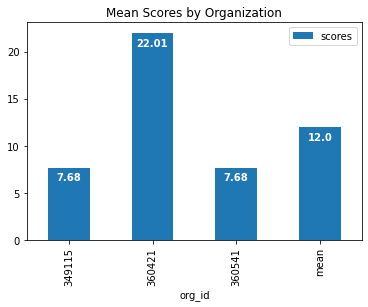

In [60]:
def scores_by_orgs():
  sByO = dfFlt.groupBy('org_id').agg( F.avg('final_score_unweighted').alias('scores') ).orderBy('org_id')

  pdDf = sByO.toPandas()

  # Add mean
  meanAssess = sByO.agg(F.round(F.avg(F.col('scores'))).alias('mean')).collect()[0][0]
  # Append row with mean
  pdDf = pdDf.append({'org_id': 'mean', 'scores': meanAssess}, ignore_index=True)

  ax = pdDf.plot.bar('org_id','scores', title='Mean Scores by Organization')
  annotate_plot(ax)
  plt.show()

scores_by_orgs()